In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('failure.csv')

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [5]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [6]:
df.shape

(124494, 12)

In [7]:
df["date"]=pd.to_datetime(df["date"])

In [8]:
df["year"]=2021-df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day

In [9]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,6,1,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,6,1,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,6,1,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,6,1,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,6,1,1


In [10]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622,NaN,0.000321,0.002994
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122,NaN,-0.005613,-0.000239
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736,NaN,-0.006416,-0.010000
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366,NaN,-0.001101,-0.004232
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069,NaN,-0.005490,-0.008383
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949,NaN,-0.014129,0.009526
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152,NaN,0.138159,0.019483
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,NaN,0.020576,0.009194
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,NaN,0.020576,0.009194
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000,NaN,-0.025383,-0.012316


In [11]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.0,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524,6.0,4.028299,14.894196
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623,0.0,2.572167,8.759542
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,6.0,1.000000,1.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,6.0,2.000000,7.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,6.0,3.000000,15.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,6.0,6.000000,22.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,6.0,11.000000,31.000000


In [12]:
df.failure.value_counts() #başarı sayısı 106 başarısızlık 124388 (imbalanced data set)

0    124388
1       106
Name: failure, dtype: int64

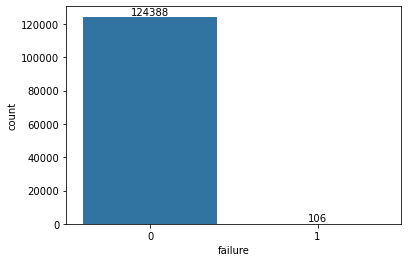

In [13]:
ax=sns.countplot(x=df["failure"])
ax.bar_label(ax.containers[0]);

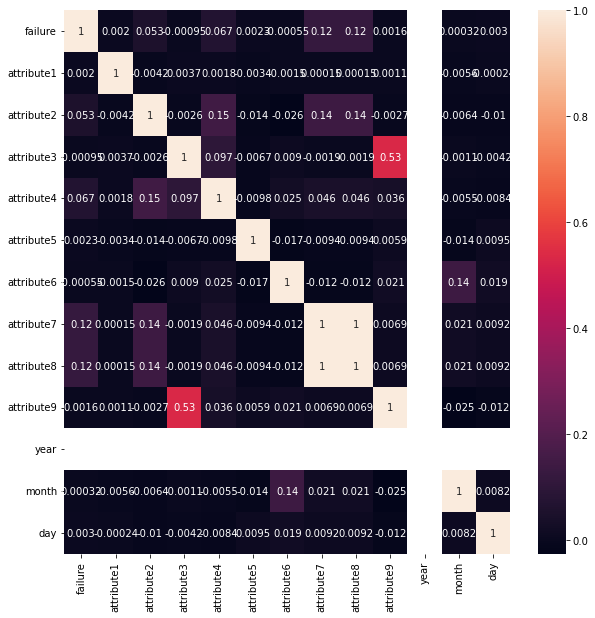

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

In [15]:
# check if the two features are same
(df['attribute7']==df['attribute8']).value_counts()

True    124494
dtype: int64

In [16]:
# then I drop attribute 8, as it is duplicated.
df.drop('attribute8',axis=1,inplace=True)

In [17]:
df.drop('date',axis=1,inplace=True)

In [18]:
df.drop('year',axis=1,inplace=True)

In [19]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,day
0,S1F01085,0,215630672,56,0,52,6,407438,0,7,1,1
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,1,1
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,1,1
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,1,1
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,1,1


In [20]:
df.tail()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,day
124489,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0,11,2
124490,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13,11,2
124491,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,11,2
124492,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,11,2
124493,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,11,2


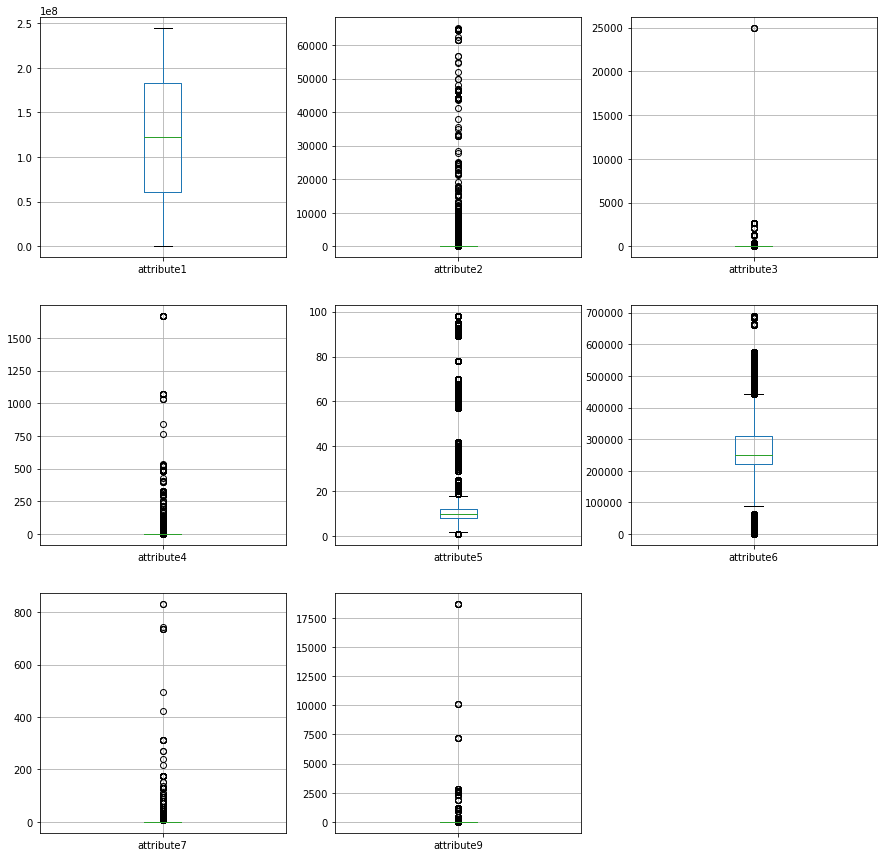

In [21]:

fig = plt.figure(figsize = (15, 15))
plt.subplot(3,3,1)
df.boxplot(column=['attribute1']) 
plt.subplot(3,3,2)
df.boxplot(column=['attribute2'])
plt.subplot(3,3,3)
df.boxplot(column=['attribute3']) 
plt.subplot(3,3,4)
df.boxplot(column=['attribute4'])
plt.subplot(3,3,5)
df.boxplot(column=['attribute5']) 
plt.subplot(3,3,6)
df.boxplot(column=['attribute6'])
plt.subplot(3,3,7)
df.boxplot(column=['attribute7']) 
plt.subplot(3,3,8)
df.boxplot(column=['attribute9']) 
plt.show()

In [22]:
df[['attribute3','attribute4','attribute7','attribute9']]=df[['attribute3','attribute4','attribute7','attribute9']].astype('object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      124494 non-null  object
 1   failure     124494 non-null  int64 
 2   attribute1  124494 non-null  int64 
 3   attribute2  124494 non-null  int64 
 4   attribute3  124494 non-null  object
 5   attribute4  124494 non-null  object
 6   attribute5  124494 non-null  int64 
 7   attribute6  124494 non-null  int64 
 8   attribute7  124494 non-null  object
 9   attribute9  124494 non-null  object
 10  month       124494 non-null  int64 
 11  day         124494 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 11.4+ MB


In [24]:
outliers=df.quantile(.97)
df=df[(df['attribute1']<outliers['attribute1'])]
df=df[(df['attribute2']<outliers['attribute2'])]
df=df[(df['attribute6']<outliers['attribute6'])]

In [25]:
df=pd.get_dummies(df,drop_first=True)

In [26]:
x=df.drop('failure',axis=1)
y=df['failure']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=42)

In [29]:
y_train.shape, y_test.shape

((68096,), (45398,))

In [38]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    from sklearn.ensemble import GradientBoostingClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)
    
    
    algos=[g,b,KN,SVC,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    
    RUS=RandomUnderSampler(random_state=42)
    x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)
    
    for item in algos:

        #item.fit(x_RUS,y_RUS)
        predict=item.fit(x_RUS,y_RUS).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)  

In [39]:
classification_funct(x,y)

,accuracy_score,f1_score,recall_score,precision_score
BernoulliNB,0.951716,0.004360,0.272727,0.002198
RandomForestClassifier,0.808240,0.002201,0.545455,0.001103
GradientBoostingClassifier,0.577324,0.001000,0.545455,0.000500
GaussianNB,0.567456,0.000977,0.545455,0.000489
SVC,0.556319,0.001269,0.727273,0.000635
XGBClassifier,0.546099,0.000931,0.545455,0.000466
DecisionTreeClassifier,0.520829,0.001029,0.636364,0.000515
KNeighborsClassifier,0.501903,0.000990,0.636364,0.000495
LogisticRegression,0.067985,0.000680,0.818182,0.000340
